<font size=6><b> lec10. object 변수

# 범주형 변수 categorical data 처리
* 라벨인코딩(Label Encoding)
* 원핫인코딩(One-hot Encoding)
* get_dummies()
* astype('category')

## (1) 라벨인코딩(Label Encoding)
> * n개의 범주형 데이터를 0부터 n-1까지의 연속적 수치 데이터로 표현

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

In [126]:
df = pd.DataFrame({"name":["smith",'martin',"jones","allen","king"],"score": ["A","B",np.nan,"A","C"]})
df.head()

,name,score
0,smith,A
1,martin,B
2,jones,NaN
3,allen,A
4,king,C


In [3]:
from sklearn.preprocessing import LabelEncoder # 글자를 숫자로

In [4]:
le = LabelEncoder()               # 클래스이름()        생성자함수: 초기화
le.fit(df['name'])                # 사전순으로 소팅하여 피팅
res = le.transform(df['name'])    # 변환
df['name_labelencoder'] = res

le.fit(df['score'])
res = le.transform(df['score'])   
df['score_labelencoder'] = res

df

,name,score,name_labelencoder,score_labelencoder
0,smith,A,4,0
1,martin,B,3,1
2,jones,NaN,1,3
3,allen,A,0,0
4,king,C,2,2


## (2) 원핫인코딩(One-hot Encoding)
> * 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 벡터 표현 방식
> *  데이터프레임에서 object 타입으로 되어있는 변수는 dummy 변수화
> * <font color=red><b> 판다스의 시리즈가 아닌 numpy 행렬을 입력해야함 → df['컬럼'].values
> * <font color=red><b> 벡터 입력을 허용하지 않음 → reshape(-1,1)을 이용해 Matrix로 변환  (N,) → (N,1)

In [5]:
from sklearn.preprocessing import OneHotEncoder   # 컬럼을 unique갯수만큼 만들어 1 0으로 변환

In [6]:
df

,name,score,name_labelencoder,score_labelencoder
0,smith,A,4,0
1,martin,B,3,1
2,jones,NaN,1,3
3,allen,A,0,0
4,king,C,2,2


In [7]:
df['name'].values

array(['smith', 'martin', 'jones', 'allen', 'king'], dtype=object)

In [8]:
df['name'].values.shape

(5,)

In [9]:
df['name'].values.reshape(-1,1)

array([['smith'],
       ['martin'],
       ['jones'],
       ['allen'],
       ['king']], dtype=object)

In [10]:
df['name'].values.reshape(-1,1).shape

(5, 1)

In [11]:
df[['name']].values

array([['smith'],
       ['martin'],
       ['jones'],
       ['allen'],
       ['king']], dtype=object)

OneHotEncoder을 쓰려면 위에 예제처럼 2차원 (-1,1) 배열로 만들어 써야함(2차원배열: 매트릭스)

In [12]:
on = OneHotEncoder(sparse=False)
on.fit(df[['name']].values)
res = on.transform(df[['name']].values)
res

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [13]:
df['name'].sort_values().values

array(['allen', 'jones', 'king', 'martin', 'smith'], dtype=object)

In [14]:
on.categories_[0]

array(['allen', 'jones', 'king', 'martin', 'smith'], dtype=object)

In [15]:
df = pd.concat([df, pd.DataFrame(res, columns=on.categories_[0])], axis=1)
df

,name,score,name_labelencoder,score_labelencoder,allen,jones,king,martin,smith
0,smith,A,4,0,0.0,0.0,0.0,0.0,1.0
1,martin,B,3,1,0.0,0.0,0.0,1.0,0.0
2,jones,NaN,1,3,0.0,1.0,0.0,0.0,0.0
3,allen,A,0,0,1.0,0.0,0.0,0.0,0.0
4,king,C,2,2,0.0,0.0,1.0,0.0,0.0


In [16]:
on = OneHotEncoder(sparse=False)
on.fit(df[['score']].values)
res = on.transform(df[['score']].values)
df = pd.concat([df, pd.DataFrame(res, columns=on.categories_[0])], axis=1)
df

,name,score,name_labelencoder,score_labelencoder,allen,jones,king,martin,smith,A,B,C,NaN
0,smith,A,4,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,martin,B,3,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,jones,NaN,1,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,allen,A,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,king,C,2,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## (3) get_dummies() = 결측처리+라벨인코딩(Label Encoding)+원핫인코딩(One-hot Encoding)

In [17]:
df = pd.DataFrame({"name":["smith",'martin',"jones","allen","king"],"score": ["A","B",np.nan,"A","C"]}, index=[10,20,30,40,50])
df.head()

,name,score
10,smith,A
20,martin,B
30,jones,NaN
40,allen,A
50,king,C


In [18]:
pd.concat([pd.get_dummies(df['name']),pd.get_dummies(df['score'])], axis=1)

,allen,jones,king,martin,smith,A,B,C
10,0,0,0,0,1,1,0,0
20,0,0,0,1,0,0,1,0
30,0,1,0,0,0,0,0,0
40,1,0,0,0,0,1,0,0
50,0,0,1,0,0,0,0,1


## (4) category타입
> * df['컬럼'].astype('category').cat.codes
> * df['컬럼'].astype('category').cat.categories

In [116]:
df = pd.DataFrame({"name":["smith",'martin',"jones","allen","king"],"score": ["A","B",np.nan,"A","C"]}, index=[10,20,30,40,50])
df.head()

,name,score
10,smith,A
20,martin,B
30,jones,NaN
40,allen,A
50,king,C


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 10 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    5 non-null      object
 1   score   4 non-null      object
dtypes: object(2)
memory usage: 120.0+ bytes


In [118]:
df = df[['name','score']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 10 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   name    5 non-null      category
 1   score   4 non-null      category
dtypes: category(2)
memory usage: 394.0 bytes


In [119]:
df['score'].cat.codes

10    0
20    1
30   -1
40    0
50    2
dtype: int8

In [120]:
df['score'].cat.categories

Index(['A', 'B', 'C'], dtype='object')

In [125]:
df['name_cat'] = df['name'].cat.codes
df['score_cat'] = df['score'].cat.codes
df

,name,score,name_cat,score_cat
10,smith,A,4,0
20,martin,B,3,1
30,jones,NaN,1,-1
40,allen,A,0,0
50,king,C,2,2


In [124]:
(code, cate) = pd.factorize(df['score'])
print(code)
print(cate.values)

[ 0  1 -1  0  2]
['A', 'B', 'C']
Categories (3, object): ['A', 'B', 'C']


# 연속형 변수 Bining 처리

* 구간화(Bining)

## (1) 구간화(Bining)
> * 연속형 데이터를 구간으로 나누어 범주화하는 방법
> * pd.cut()  : 동일 구간으로 나누기, 범위기준
> * pd.qcut() : 동일 갯수로 나누기, 갯수기준

In [19]:
import matplotlib.pyplot as plt

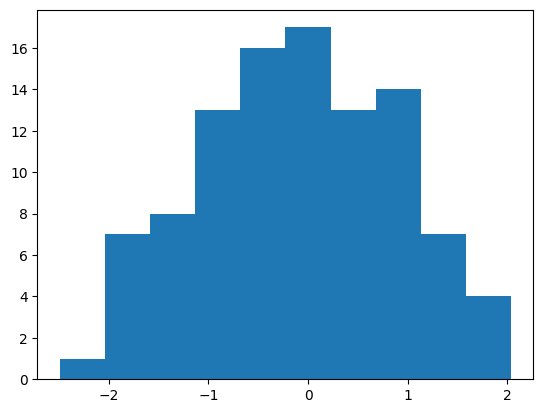

In [20]:
np.random.seed(100)
ndate = np.random.normal(0,1,size=100)
plt.hist(ndate)
plt.show()

In [67]:
gugan = [-5, -1, 0.62, 5]
label = ['테','스','트']
cutdata = pd.cut(ndate, gugan, labels=label)
cutdata.describe()

,counts,freqs
categories,,
테,20,0.20
스,54,0.54
트,26,0.26


In [38]:
cutdata = pd.cut(ndate, 5)
cutdata.describe()

,counts,freqs
categories,,
"(-2.492, -1.583]",8,0.08
"(-1.583, -0.678]",21,0.21
"(-0.678, 0.226]",33,0.33
"(0.226, 1.13]",27,0.27
"(1.13, 2.035]",11,0.11


In [79]:
cutdata = pd.qcut(ndate, 5)
cutdata.describe()

,counts,freqs
categories,,
"(-2.488, -0.995]",20,0.2
"(-0.995, -0.401]",20,0.2
"(-0.401, 0.199]",20,0.2
"(0.199, 0.75]",20,0.2
"(0.75, 2.035]",20,0.2
